# Import Data

# Preprocessing Data

In [ ]:
pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45917 sha256=2224b7c341376b8e2f734499cb85e232c4927ab2772c435529da63b304fe0e0b
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from jcopml.plot import plot_correlation_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
from torch.utils.data import Dataset, DataLoader
import torch

In [ ]:
# mengimpor dataset dari lokal drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# menampilkan dataset 5 data teratas
import pandas as pd
df = pd.read_excel("Financial Distress Data.xlsx")
df.head()

# menampilkan informasi dataset
df.info()

# menghapus kolom yang tidak perlu
df.drop(['Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Kolom yang akan dikecualikan dari normalisasi
columns_to_exclude = ['Financial Distress', 'Nama_Bank']

# Menduplikat dataframe
normalized_data = df.copy()

# Inisialisasi objek scaler
scaler = StandardScaler()

# Melakukan normalisasi pada kolom yang tidak dikecualikan
columns_to_normalize = [col for col in df.columns if col not in columns_to_exclude]
normalized_data[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import drive
# import datasets from local drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/skripsi_anti/data

/content/gdrive/MyDrive/skripsi_anti/data


In [ ]:
%ls

'Copy of Data Financial Distress Fix.xlsx'  'Financial Distress Data.xlsx'
'Data Financial Distress Fix.xlsx'


In [ ]:
import pandas as pd

df = pd.read_excel("Financial Distress Data.xlsx")
df.head()

,Nama_Bank,Tahun,CAR,ROA,ROE,LDR,BOPO,NIM,NPL,Financial Distress,Unnamed: 10,Unnamed: 11
0,JTrust,2013,14.03,-7.58,-142.48,96.31,173.80,1.67,12.28,1,NaN,NaN
1,Raya,2021,20.24,-14.75,-95.44,86.01,287.86,3.87,3.98,1,NaN,NaN
2,Panin Dubai,2017,11.51,-10.77,-94.01,86.95,217.40,5.20,12.52,1,NaN,NaN
3,Jago,2019,148.28,-15.89,-89.03,47.54,258.09,2.05,2.05,1,NaN,NaN
4,Neo Commerce,2021,55.49,-13.71,-84.61,56.73,224.01,5.15,1.75,1,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nama_Bank           470 non-null    object 
 1    Tahun              470 non-null    int64  
 2   CAR                 470 non-null    float64
 3   ROA                 470 non-null    float64
 4   ROE                 470 non-null    float64
 5   LDR                 470 non-null    float64
 6   BOPO                470 non-null    float64
 7   NIM                 470 non-null    float64
 8   NPL                 470 non-null    float64
 9   Financial Distress  470 non-null    int64  
 10  Unnamed: 10         2 non-null      float64
 11  Unnamed: 11         2 non-null      float64
dtypes: float64(9), int64(2), object(1)
memory usage: 44.2+ KB


In [ ]:
df.drop(['Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)

In [ ]:
df['Financial Distress'].value_counts()

0    327
1    143
Name: Financial Distress, dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of         Nama_Bank   Tahun     CAR    ROA     ROE    LDR    BOPO   NIM    NPL  \
0          JTrust    2013   14.03  -7.58 -142.48  96.31  173.80  1.67  12.28   
1            Raya    2021   20.24 -14.75  -95.44  86.01  287.86  3.87   3.98   
2     Panin Dubai    2017   11.51 -10.77  -94.01  86.95  217.40  5.20  12.52   
3            Jago    2019  148.28 -15.89  -89.03  47.54  258.09  2.05   2.05   
4    Neo Commerce    2021   55.49 -13.71  -84.61  56.73  224.01  5.15   1.75   
..            ...     ...     ...    ...     ...    ...     ...   ...    ...   
465       Mandiri    2013   14.93   3.66   27.31  82.97   62.41  5.68   1.60   
466           BCA    2013   15.70   3.80   28.20  75.40   61.50  6.20   0.40   
467           BRI    2015   20.59   4.19   29.89  86.88   67.96  8.13   2.02   
468           BRI    2014   18.31   4.73   31.19  81.68   65.42  8.51   1.69   
469           BRI    2013   16.99   5.03   34.11  88.54   60.58  8.55   1.55   

     Financial Distress  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
..                  ...  
465                   0  
466                   0  
467                   0  
468                   0  
469                   0  

[470 rows x 10 columns]>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Kolom yang akan dikecualikan dari normalisasi
columns_to_exclude = ['Financial Distress', 'Nama_Bank']

# Menduplikat dataframe
normalized_data = df.copy()

# Inisialisasi objek scaler
scaler = StandardScaler()

# Melakukan normalisasi pada kolom yang tidak dikecualikan
columns_to_normalize = [col for col in df.columns if col not in columns_to_exclude]
normalized_data[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(normalized_data)

        Nama_Bank     Tahun       CAR       ROA       ROE       LDR      BOPO  \
0          JTrust -1.566699 -0.593828 -3.127745 -7.925535  0.155332  2.719011   
1            Raya  1.218544 -0.276246 -5.795681 -5.369843 -0.079629  6.576230   
2     Panin Dubai -0.174078 -0.722701 -4.314735 -5.292151 -0.058186  4.193452   
3            Jago  0.522233  6.271766 -6.219872 -5.021586 -0.957199  5.569484   
4    Neo Commerce  1.218544  1.526452 -5.408700 -4.781447 -0.747559  4.416986   
..            ...       ...       ...       ...       ...       ...       ...   
465       Mandiri -1.566699 -0.547801  1.054626  1.299187 -0.148977 -1.047915   
466           BCA -1.566699 -0.508423  1.106720  1.347541 -0.321662 -1.078688   
467           BRI -0.870388 -0.258347  1.251838  1.439359 -0.059783 -0.860228   
468           BRI -1.218544 -0.374947  1.452770  1.509988 -0.178404 -0.946124   
469           BRI -1.566699 -0.442452  1.564399  1.668633 -0.021915 -1.109801   

          NIM       NPL  Fi

In [ ]:
data = pd.DataFrame(normalized_data)
data.head()

,Nama_Bank,Tahun,CAR,ROA,ROE,LDR,BOPO,NIM,NPL,Financial Distress
0,JTrust,-1.566699,-0.593828,-3.127745,-7.925535,0.155332,2.719011,-1.285846,3.577462,1
1,Raya,1.218544,-0.276246,-5.795681,-5.369843,-0.079629,6.576230,-0.421212,0.378885,1
2,Panin Dubai,-0.174078,-0.722701,-4.314735,-5.292151,-0.058186,4.193452,0.101499,3.669951,1
3,Jago,0.522233,6.271766,-6.219872,-5.021586,-0.957199,5.569484,-1.136500,-0.364880,1
4,Neo Commerce,1.218544,1.526452,-5.408700,-4.781447,-0.747559,4.416986,0.081849,-0.480492,1


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Financial Distress', 'Nama_Bank', ' Tahun'], axis=1)
y = data['Financial Distress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 7), (118, 7), (352,), (118,))

In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tahun,CAR,ROA,ROE,LDR,BOPO,NIM,NPL,Financial Distress
Tahun,1.000000,0.145056,-0.150742,-0.125516,-0.143335,0.133452,-0.128870,0.127453,0.163417
CAR,0.145056,1.000000,-0.183860,-0.118732,0.296616,0.179714,0.250791,-0.072399,0.076512
ROA,-0.150742,-0.183860,1.000000,0.850229,-0.068089,-0.897993,0.215521,-0.378141,-0.601567
ROE,-0.125516,-0.118732,0.850229,1.000000,-0.055144,-0.824571,0.266840,-0.444279,-0.581933
LDR,-0.143335,0.296616,-0.068089,-0.055144,1.000000,0.058323,0.246593,0.039450,0.068461
BOPO,0.133452,0.179714,-0.897993,-0.824571,0.058323,1.000000,-0.209110,0.387480,0.596336
NIM,-0.128870,0.250791,0.215521,0.266840,0.246593,-0.209110,1.000000,-0.071501,-0.261159
NPL,0.127453,-0.072399,-0.378141,-0.444279,0.039450,0.387480,-0.071501,1.000000,0.394407
Financial Distress,0.163417,0.076512,-0.601567,-0.581933,0.068461,0.596336,-0.261159,0.394407,1.000000


<ipython-input-20-debcb674374a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<Axes: >

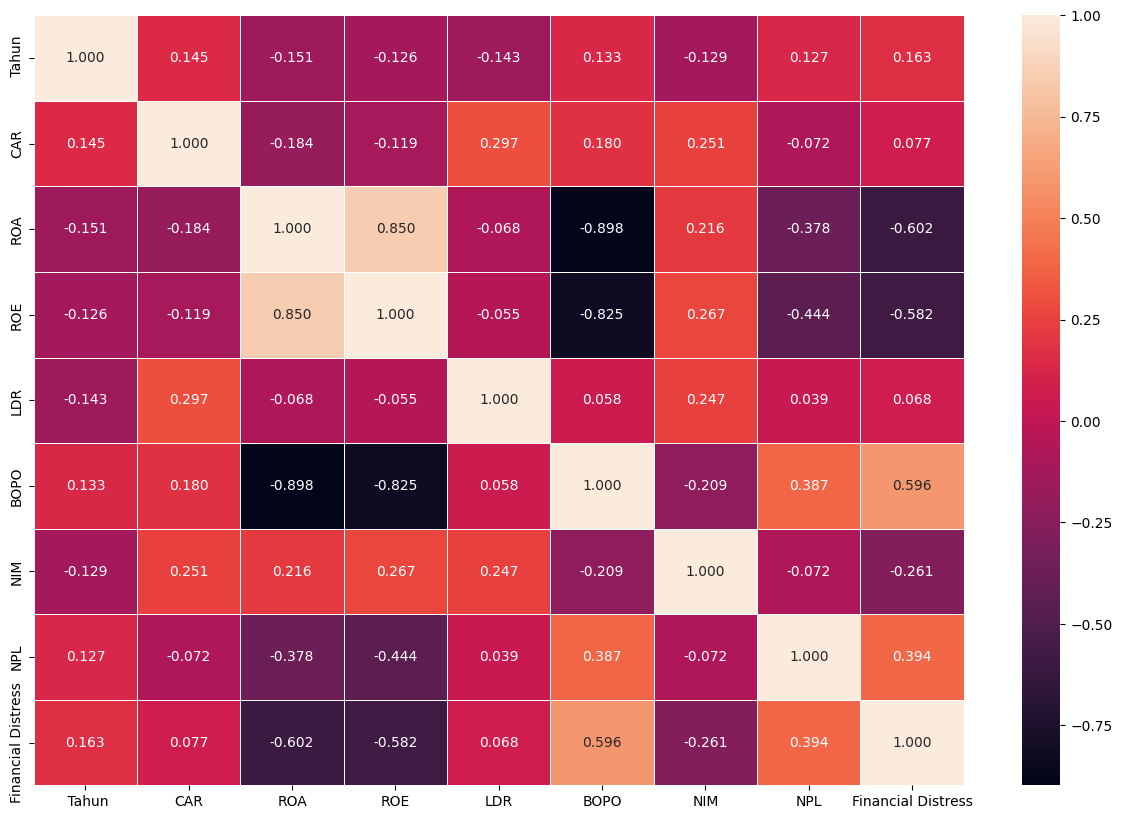

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

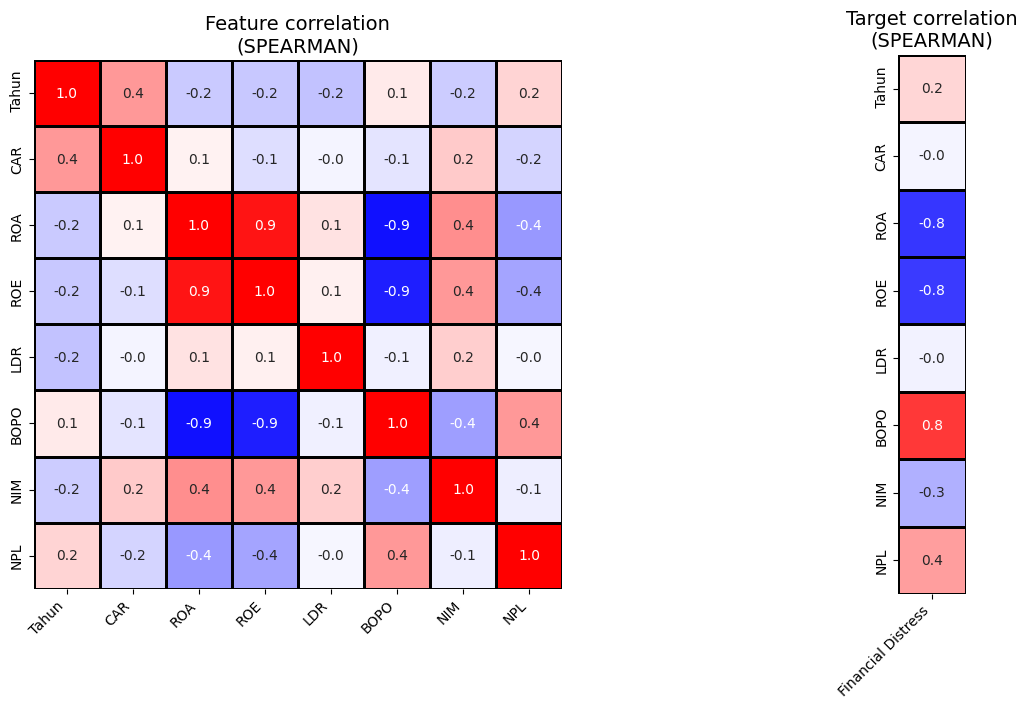

In [ ]:
# Melihat Korelasi Data
plot_correlation_matrix(df, 'Financial Distress', numeric_col='auto')

In [ ]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

NameError: name 'dfClean' is not defined

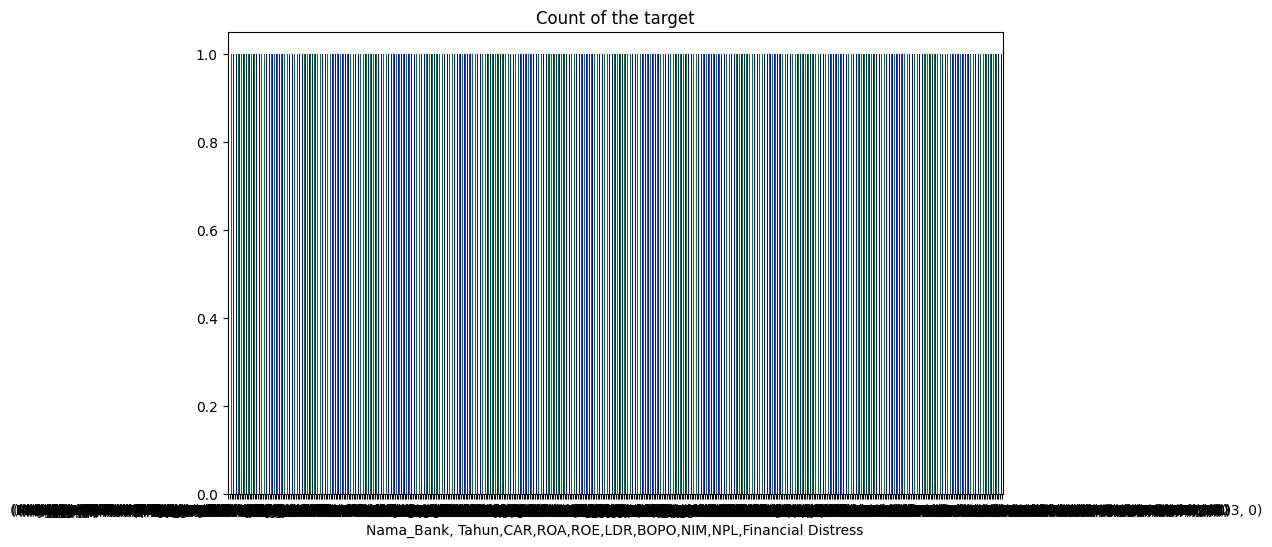

In [ ]:
df.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

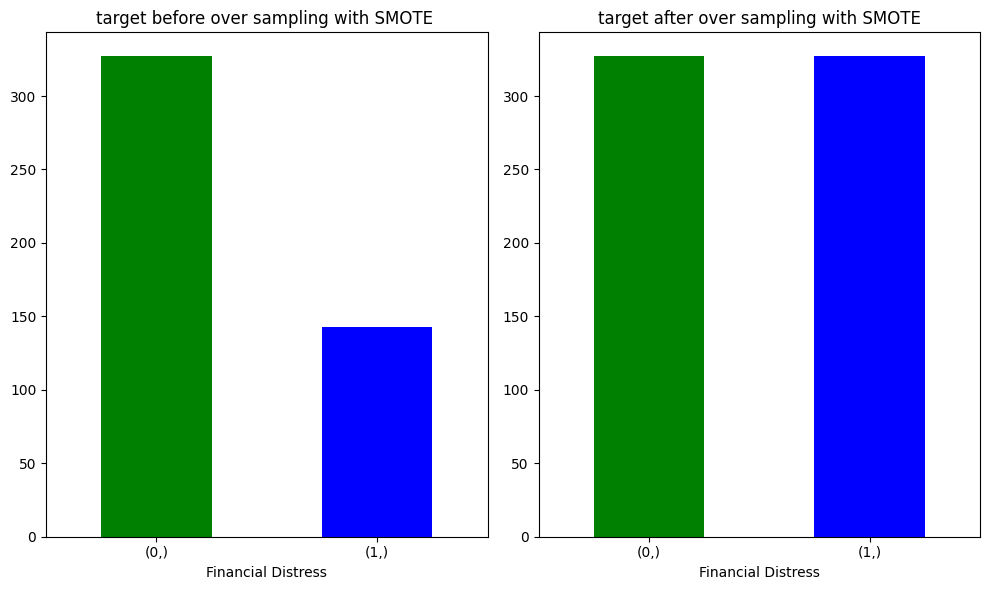

In [ ]:

plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [ ]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

Financial Distress
0                     327
1                     143
dtype: int64

In [ ]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

Financial Distress
0                     327
1                     327
dtype: int64

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
from torch.utils.data import Dataset, DataLoader
import torch

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [ ]:
# membagi data x dan y kemudian melakukan train test split
X = data.drop(['Financial Distress', 'Nama_Bank', 'Tahun'], axis=1)
y = data['Financial Distress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# melakukan pelatihan model
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# menampilkan akurasi dan mengebaluasi model xgboost
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

KeyError: "['Tahun'] not found in axis"

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.992
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.97      0.99        36

    accuracy                           0.99       118
   macro avg       0.99      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118



In [ ]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.992, 'recall': 0.992, 'F1 score': 0.991, 'Precision score': 0.992}


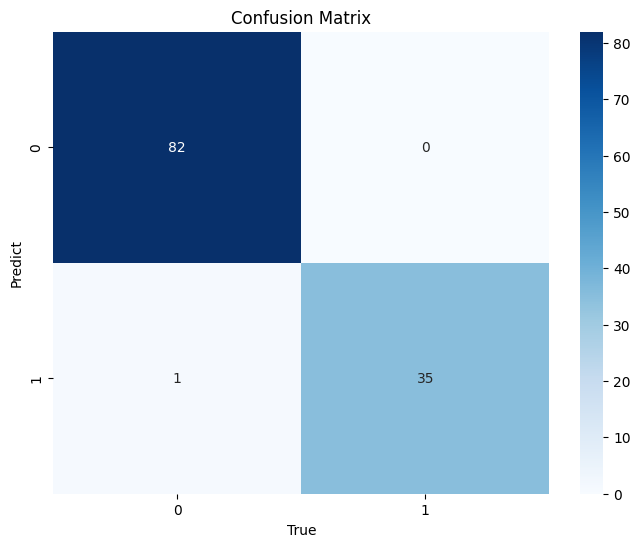

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# METODE ANN


In [ ]:
df.head()

,Nama_Bank,Tahun,CAR,ROA,ROE,LDR,BOPO,NIM,NPL,Financial Distress
0,JTrust,2013,14.03,-7.58,-142.48,96.31,173.80,1.67,12.28,1
1,Raya,2021,20.24,-14.75,-95.44,86.01,287.86,3.87,3.98,1
2,Panin Dubai,2017,11.51,-10.77,-94.01,86.95,217.40,5.20,12.52,1
3,Jago,2019,148.28,-15.89,-89.03,47.54,258.09,2.05,2.05,1
4,Neo Commerce,2021,55.49,-13.71,-84.61,56.73,224.01,5.15,1.75,1


In [ ]:
df.columns

Index(['Nama_Bank', ' Tahun', 'CAR', 'ROA', 'ROE', 'LDR', 'BOPO', 'NIM', 'NPL',
       'Financial Distress'],
      dtype='object')

In [ ]:
x = df.drop(['Nama_Bank', ' Tahun', 'Financial Distress'], axis=1)
y = df['Financial Distress'].values

In [ ]:
x.describe()

,CAR,ROA,ROE,LDR,BOPO,NIM,NPL
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,25.641723,0.825723,3.397191,89.500700,93.397392,4.941742,2.996830
std,19.574862,2.690334,18.425587,43.883667,29.602040,2.547138,2.597669
min,8.020000,-15.890000,-142.480000,1.430000,33.280000,-3.520000,0.000000
25%,16.917500,0.292500,1.435000,76.892500,79.925000,3.772500,1.565000
50%,20.740000,1.105000,6.280000,86.485000,88.955000,4.695000,2.575000
75%,25.685000,1.970000,11.210000,94.070000,97.607500,5.695000,3.805000
max,181.380000,17.630000,34.110000,630.820000,287.860000,19.300000,30.580000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
1
x = scaler.fit_transform(x)

In [ ]:
x

array([[-0.31613557,  0.92067114,  1.04437872, ..., -1.21903091,
         0.08577886, -0.43039345],
       [-0.30897592,  0.63415637,  0.69775214, ..., -0.88389997,
        -0.08321796, -0.07199872],
       [-0.29363381,  0.30298996,  0.32396048, ..., -0.45205112,
        -0.18147193,  0.1129792 ],
       ...,
       [ 0.47807424,  0.28810607,  0.05067966, ..., -0.3076506 ,
        -0.32688779, -1.09708472],
       [ 1.76578854,  0.43694491, -0.01560317, ..., -0.51427523,
         0.03861695, -0.84659378],
       [ 6.1623254 ,  0.67880803,  0.19465464, ..., -0.70230026,
         0.71853439, -0.70015292]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 7), (118, 7), (352,), (118,))

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

In [ ]:
class TabularData(Dataset):
  def __init__ (self, x, y):
    super(). __init__()
    self.x = torch.from_numpy(x).type(torch.float32)
    self.y = torch.from_numpy(y).type(torch.float32)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, id):
    return self.x[id], self.y[id]

In [ ]:
train_data = TabularData(X_train, y_train)

In [ ]:
len(train_data)

352

In [ ]:
train_data[0]

(tensor([-0.3816, -0.1472, -0.0487,  0.1156,  0.1195,  0.7578,  0.7643]),
 tensor(1.))

In [ ]:
test_data = TabularData(X_test, y_test)

In [ ]:
len(test_data)

118

In [ ]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

In [ ]:
class Binclr(torch.nn.Module):
  def __init__ (self):
    super().__init__()

    self.layer1 = torch.nn.Linear(in_features=7, out_features=32)
    self.layer2 = torch.nn.Linear(in_features=32, out_features=16)
    self.layer3 = torch.nn.Linear(in_features=16, out_features=1)
    self.relu = torch.nn.ReLU()

  def forward(self, x:torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Binclr().to(device)

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.2685, -0.3602, -0.1135, -0.1998,  0.0712, -0.2511, -0.2115],
                      [-0.3722,  0.0958,  0.3065, -0.2011, -0.0299,  0.2080,  0.1290],
                      [-0.0587, -0.2308, -0.3419, -0.0992, -0.2553,  0.2925,  0.2180],
                      [ 0.0805, -0.1836,  0.0683,  0.2032,  0.0063, -0.0756,  0.3664],
                      [-0.0227,  0.1279,  0.0091,  0.2662,  0.3080, -0.0323,  0.3524],
                      [ 0.0967,  0.0077, -0.3476, -0.0657, -0.1137,  0.0669, -0.1375],
                      [-0.0084,  0.1375, -0.2929, -0.1070,  0.0707,  0.1645, -0.1181],
                      [-0.0034, -0.0901, -0.1171,  0.1427, -0.1285, -0.1410,  0.2319],
                      [ 0.1728, -0.1928, -0.2511, -0.3709, -0.2533, -0.2994, -0.1705],
                      [-0.3436,  0.0927, -0.2764,  0.0399, -0.3398,  0.3610, -0.0666],
                      [-0.1926,  0.0557, -0.1541, -0.2938,  0.0199, -0.3468,  0.1751],
            

In [ ]:
next(iter(train_loader))

[tensor([[ 0.0071,  0.3067,  0.1566,  0.0937, -0.4260, -0.0361, -0.8774],
         [-0.0292,  0.4221,  0.3962, -0.6162, -0.6712, -0.5823,  0.3673],
         [-0.4829,  0.9951,  1.0976, -0.0388, -0.7980,  0.4945, -0.3841],
         [ 0.6627,  0.7049,  0.2229, -0.0329, -0.7412,  0.5928, -0.2840],
         [-0.6194, -1.4980, -2.4213,  0.0899,  1.2608, -0.5666,  1.7855],
         [-0.0543, -0.1138,  0.0757, -0.4818,  0.0305, -1.3409,  0.3442],
         [-0.1325,  0.2695,  0.2680, -0.4061, -0.5714, -0.4409, -0.2454],
         [ 0.3610, -0.2738, -0.1558, -1.1148,  0.1090, -1.6828, -0.1838]]),
 tensor([0., 0., 0., 0., 1., 1., 0., 1.])]

In [ ]:
loss = torch.nn.BCELoss()
optim = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [ ]:
epochs = 30

for epoch in range(epochs):
  temp_loss = []
  for i, (features, target) in enumerate(train_loader):
    model.train()

    y_pred = model(features)

    y_pred = torch.sigmoid(y_pred)

    loss_fn = loss(y_pred.squeeze(), target)

    temp_loss.append(loss_fn.item())

    optim.zero_grad()

    loss_fn.backward()

    optim.step()

  print(f"epoch {epoch} | loss: {sum(temp_loss)/len(temp_loss)}")

epoch 0 | loss: 0.6263416680422697
epoch 1 | loss: 0.5423289388418198
epoch 2 | loss: 0.42022833126512443
epoch 3 | loss: 0.29768299480730837
epoch 4 | loss: 0.2252259315414862
epoch 5 | loss: 0.18230833011594685
epoch 6 | loss: 0.15749927318062296
epoch 7 | loss: 0.1358292105935768
epoch 8 | loss: 0.11887111866169355
epoch 9 | loss: 0.1048412956694268
epoch 10 | loss: 0.09227514831052924
epoch 11 | loss: 0.08251644945200744
epoch 12 | loss: 0.07437448034100023
epoch 13 | loss: 0.0664327067444736
epoch 14 | loss: 0.06127561818588716
epoch 15 | loss: 0.055942440520580436
epoch 16 | loss: 0.0515200722198973
epoch 17 | loss: 0.04744913378294768
epoch 18 | loss: 0.04489395122932778
epoch 19 | loss: 0.042036922486162934
epoch 20 | loss: 0.03978851920493815
epoch 21 | loss: 0.037270162375617394
epoch 22 | loss: 0.0350927129272391
epoch 23 | loss: 0.033267559414277705
epoch 24 | loss: 0.03167245746292544
epoch 25 | loss: 0.030860807234014166
epoch 26 | loss: 0.03049779679167841
epoch 27 | los

In [ ]:
y_pred = torch.sigmoid(model(torch.from_numpy(X_test).to(torch.float32))).detach().numpy()
y_pred

array([[2.6583091e-05],
       [4.0435964e-08],
       [3.3831500e-04],
       [1.2969253e-04],
       [1.0000000e+00],
       [2.2800716e-05],
       [9.9999738e-01],
       [6.2508894e-11],
       [9.3323953e-04],
       [9.9297196e-01],
       [9.9916208e-01],
       [2.1740194e-02],
       [1.6063343e-05],
       [9.1594720e-01],
       [1.0880514e-12],
       [9.7187415e-02],
       [6.4064984e-08],
       [1.0290878e-12],
       [6.0309369e-10],
       [2.6574248e-01],
       [9.9753016e-01],
       [3.5633958e-11],
       [7.1736245e-08],
       [1.0000000e+00],
       [2.5380694e-03],
       [9.3791849e-19],
       [1.8681654e-06],
       [2.1815933e-05],
       [2.0104098e-04],
       [5.5095670e-03],
       [2.2861396e-18],
       [9.9999917e-01],
       [1.7232630e-12],
       [2.0155894e-05],
       [9.9537128e-01],
       [4.1438203e-10],
       [6.8805218e-02],
       [9.9891663e-01],
       [7.2974882e-07],
       [1.0214470e-13],
       [9.1174315e-06],
       [9.851042

In [ ]:
y_pred = (y_pred>0.5).astype(int).squeeze()
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_ANN = round(accuracy_score(y_test, y_pred),3)
print("Accuracy:",accuracy_ANN)
print("Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Model:
Accuracy: 0.983
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        82
           1       0.97      0.97      0.97        36

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

score = accuracy_score(y_test, y_pred)

score

0.9830508474576272

In [ ]:
from sklearn.metrics import classification_report

score = classification_report(y_test, y_pred)

print(score)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        82
           1       0.97      0.97      0.97        36

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [ ]:
evaluation(y_test, y_pred)

{'accuracy': 0.983, 'recall': 0.983, 'F1 score': 0.983, 'Precision score': 0.983}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

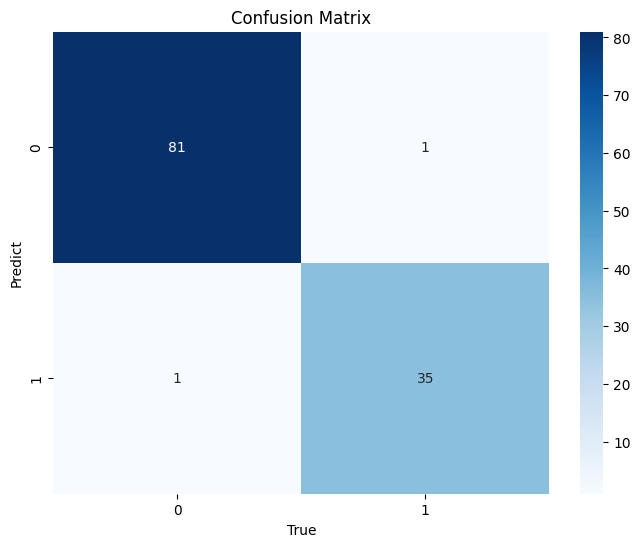

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
# membagi data x dan y
x = df.drop(['Nama_Bank', 'Tahun', 'Financial Distress'], axis=1)
y = df['Financial Distress'].values

# mengubah data x menjadi array dan melakukan standar scaler
scaler = StandardScaler()
1
x = scaler.fit_transform(x)

# melakukan train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# membuat class Tabular Data
class TabularData(Dataset):
  def __init__ (self, x, y):
    super(). __init__()
    self.x = torch.from_numpy(x).type(torch.float32)
    self.y = torch.from_numpy(y).type(torch.float32)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, id):
    return self.x[id], self.y[id]

# membuat dataloader
train_data = TabularData(X_train, y_train)
test_data = TabularData(X_test, y_test)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

# membuat kelas binclr
class Binclr(torch.nn.Module):
  def __init__ (self):
    super().__init__()

    self.layer1 = torch.nn.Linear(in_features=7, out_features=32)
    self.layer2 = torch.nn.Linear(in_features=32, out_features=16)
    self.layer3 = torch.nn.Linear(in_features=16, out_features=1)
    self.relu = torch.nn.ReLU()

  def forward(self, x:torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# menginisialisasi peragkat dan membuat objek model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Binclr().to(device)

# menentukan fungsi loss dan optimizer
loss = torch.nn.BCELoss()
optim = torch.optim.Adam(params=model.parameters(), lr=0.001)

# melakukan training model
epochs = 30

for epoch in range(epochs):
  temp_loss = []
  for i, (features, target) in enumerate(train_loader):
    model.train()

    y_pred = model(features)

    y_pred = torch.sigmoid(y_pred)

    loss_fn = loss(y_pred.squeeze(), target)

    temp_loss.append(loss_fn.item())

    optim.zero_grad()

    loss_fn.backward()

    optim.step()

  print(f"epoch {epoch} | loss: {sum(temp_loss)/len(temp_loss)}")

# melakukan prediksi pada data testing
y_pred = torch.sigmoid(model(torch.from_numpy(X_test).to(torch.float32))).detach().numpy()

# melakukan evaluasi model
print("\nXGBoost Model:")
accuracy_ANN = round(accuracy_score(y_test, y_pred),3)
print("Accuracy:",accuracy_ANN)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## 8) Evaluasi <a class="anchor" id="h8"></a>

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_comp1 = pd.DataFrame({'Model': ['XGBoost','ANN'], 'Accuracy': [accuracy_xgb_smote*100, accuracy_ANN*100]})
model_comp1.head()

,Model,Accuracy
0,XGBoost,96.6
1,ANN,98.3


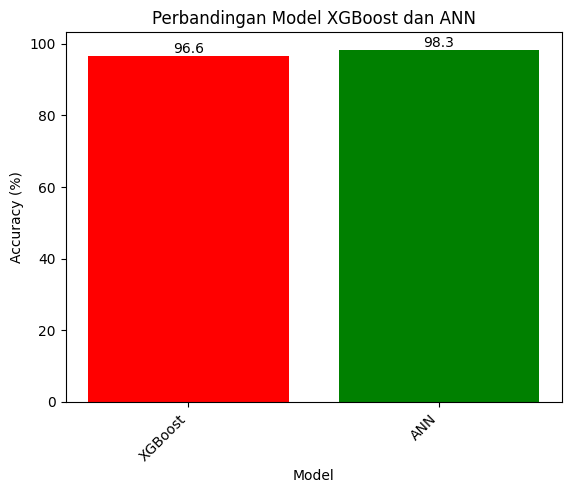

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Perbandingan Model XGBoost dan ANN')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()